# Import libary

In [155]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time 

In [156]:
def find_closest_centroids(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [157]:
def compute_centroids(X, labels, k_clusters):
    centroids = np.empty((k_clusters, X.shape[1]))
    for i in range(k_clusters):
        mask = (labels == i)
        if np.any(mask):
            centroids[i] = np.mean(X[mask], axis=0)
        else:
            centroids[i] = np.zeros(X.shape[1])
    return centroids

In [158]:
def run_kmeans(X, initial_centroids, k_clusters, max_iter):
    centroid_history = []
    centroids = initial_centroids
    for _ in range(max_iter):
        centroid_history.append(centroids)
        labels = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, labels, k_clusters)
        if np.allclose(centroid_history[-1], centroids, rtol=1e-09, atol=0.0):
            print("Số lần lặp:", _)
            break
    return labels, centroid_history


In [159]:
def choose_in_pixels_centroids(X, k_clusters):
    random_indices = np.random.choice(range(X.shape[0]), size=k_clusters, replace=False)
    return X[random_indices]

In [160]:
def choose_random_centroids(X, k_clusters):
    centroids = np.random.randint(0, 256, size=(k_clusters, X.shape[1]))
    return centroids

In [161]:
def image_compression(image_file, k_clusters, max_iter = 300, init_centroids = 'random'):
    # Đọc ảnh và chuyển thành mảng numpy
    image = Image.open(image_file)
    image_np = np.array(image)

    # Chuyển đổi ảnh thành 1D array
    img_1d = image_np.reshape(-1, 3) / 255.0  # Reshape và chuẩn hóa giá trị [0, 1]

    # Thực hiện K-Means
    if init_centroids == 'random':
        initial_centroids = choose_random_centroids(img_1d, k_clusters)
    if init_centroids == 'in_pixels':
        initial_centroids = choose_in_pixels_centroids(img_1d, k_clusters)
    labels, centroid_history = run_kmeans(img_1d, initial_centroids, k_clusters, max_iter)

    # Tạo ảnh mới từ các centroid và nhãn
    final_centroids = centroid_history[-1]
    final_image = final_centroids[labels].reshape(image_np.shape)

    # Hiển thị ảnh gốc và ảnh sau khi giảm số lượng màu
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].set_title("Original Image")
    axs[0].imshow(image_np)
    axs[0].axis('off')
    axs[1].set_title(f"Reduced Color Image (k={k_clusters})")
    axs[1].imshow(final_image)
    axs[1].axis('off')
    plt.show()

    # Lưu ảnh đầu ra
    output_file = "output_image.png"
    Image.fromarray((final_image * 255).astype(np.uint8)).save(output_file)
    print("Lưu ảnh đầu ra thành công!")

In [162]:
def input_information():
    image_file = input("Input image file: ")
    k_clusters = int(input("Input k clusters: "))
    max_iter = int(input("Input max iterator: "))
    init_centroids = input("Input init centroids type (random/in_pixels): ")
    output_format = input("Input the output image extension (pdf/png): ")
    return image_file, k_clusters, max_iter, init_centroids, output_format

In [163]:
def print_image_information(image_file):
    try:
        # Đọc hình ảnh
        image = Image.open(image_file)

        # Lấy thông tin hình ảnh
        image_shape = image.size
        image_width, image_height = image.size
        num_channels = len(image.getbands())
        image_dtype = image.mode
        image_size = image_height* image_width

        # In thông tin hình ảnh
        print("ORIGINAL IMAGE INFORMATION")
        print("Image shape:", image_shape)
        # print("Image size: ", image_size, " bytes")
        print("Image width:", image_width, " pixels")
        print("Image height:", image_height, " pixels")
        print("Image dimension:", num_channels)
        print("Image type:", image_dtype)
    except IOError:
        print("Can not read image")

In [164]:
def image_handler(image_file, k_clusters, max_iter = 300, init_centroids = 'random'):
# Đọc ảnh và chuyển thành mảng numpy
    image = Image.open(image_file)
    image_np = np.array(image)

    # Chuyển đổi ảnh thành 1D array
    img_1d = image_np.reshape(-1, 3) / 255.0  # Reshape và chuẩn hóa giá trị [0, 1]

    # Thực hiện K-Means
    if init_centroids == 'random':
        initial_centroids = choose_random_centroids(img_1d, k_clusters)
    if init_centroids == 'in_pixels':
        initial_centroids = choose_in_pixels_centroids(img_1d, k_clusters)
    start_time = time.time()
    labels, centroid_history = run_kmeans(img_1d, initial_centroids, k_clusters, max_iter)
    end_time = time.time()
    # Tạo ảnh mới từ các centroid và nhãn
    final_centroids = centroid_history[-1]
    final_image = final_centroids[labels].reshape(image_np.shape)

    # Hiển thị ảnh gốc và ảnh sau khi giảm số lượng màu
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].set_title("Original Image")
    axs[0].imshow(image_np)
    axs[0].axis('off')
    axs[1].set_title(f"Reduced Image (k={k_clusters}, iter={max_iter}, init={init_centroids})")
    axs[1].imshow(final_image)
    axs[1].axis('off')
    plt.show()
    print("Run time: ", end_time - start_time)
    print("Final centroid: ", final_centroids * 255)
    print("Centroid_history: ", centroid_history)
    print("Labels: ", labels)
    return final_image

In [165]:
def save_image(final_image, output_format = "output.png"):
    # Lưu ảnh đầu ra
    if output_format == "png":
        output_file = "output.png"
    elif output_format == "pdf":
        output_file = "output.pdf"
    Image.fromarray((final_image * 255).astype(np.uint8)).save(output_file)
    
    print("Save output image successfully!")


In [166]:
def main():
    image_file, k_clusters, max_iter, init_centroids, output_format = input_information()
    print_image_information(image_file)
    final_image = image_handler(image_file, k_clusters, max_iter, init_centroids)
    save_image(final_image, output_format)

ORIGINAL IMAGE INFORMATION
Image shape: (800, 454)
Image width: 800  pixels
Image height: 454  pixels
Image dimension: 3
Image type: RGB


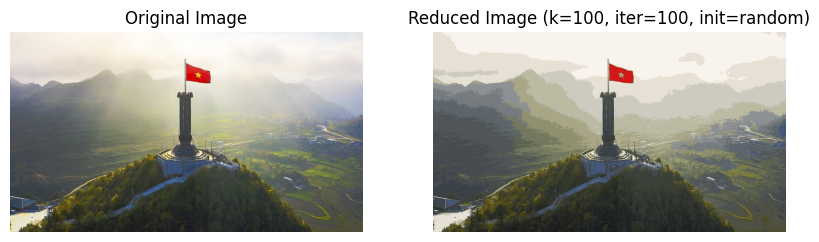

Run time:  366.73044991493225
Final centroid:  [[230.63642097 224.12878728 213.14192616]
 [205.84220479 203.98774338 192.9596232 ]
 [141.79119923 145.631968   147.65396991]
 [ 67.70797119  87.57536628 121.88477775]
 [207.25285171  24.36501901  23.75792142]
 [ 80.87287208  86.31279243  87.85749129]
 [187.34911323 186.10572988 163.67735334]
 [ 92.5888233  101.17638725 107.17961433]
 [169.21842726 166.79979345 136.24800826]
 [ 70.42925529  75.68781434  80.03072169]
 [ 59.53018402  66.15596948  71.51032316]
 [117.31889324 123.88988262 127.55664244]
 [ 50.22690952  55.70176263  48.93207991]
 [ 93.75514069  99.91360029  80.35488817]
 [ 48.81119724  53.03290267  39.86029285]
 [143.35161018 144.5306544  110.35189184]
 [ 42.13982489  47.13213054  44.08556646]
 [ 78.98658228  81.03535865  68.87485232]
 [ 41.77788244  45.50960814  34.38526752]
 [115.5143429  120.67788049  95.66368055]
 [ 59.70324132  64.13389073  54.63016837]
 [ 36.40156114  40.02341717  39.10511709]
 [124.53360825 123.04948454  

In [167]:
if __name__ == "__main__":
    main()